<a href="https://colab.research.google.com/github/AnisaAl/projectP/blob/master/Port%20of%20Durres%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

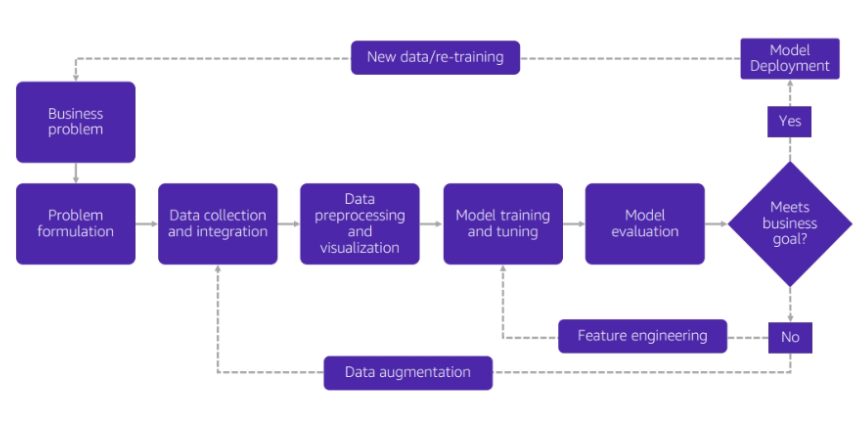

This project aims to address the problem of leveling the basin in the port of Durres.
Studying the factors that influence the filling of the pool and the reduction of the depth in the port, we will come to the conclusion of how long the pool reaches the minimum depth limits. So the goal is to calculate after how long the deepening of the port of Durres should be done.
Leveraging advanced techniques such as regression analysis, time series forecasting, and possibly deep learning models, our goal is to provide accurate projections on when dredging operations should be conducted to maintain optimal depths for maritime activities in the port of Durres.

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents.

#### <span style="color: blue;">Project presentation: Include a summary of these details in your project presentations.</span>

### 1. Determine if and why ML is an appropriate solution to deploy.

In [ ]:
# ML is an appropriate solution because we are dealing with a big amount of data and we need to use ML models to predict the outcome

### 2. Formulate the business problem, success metrics, and desired ML output.

In [ ]:
#

Business Problem:The port of Durres faces the challenge of maintaining optimal depth levels in its basin to accommodate maritime activities effectively.
The accumulation of sediments and other factors contribute to the reduction of depth, impacting vessel navigation and port operations. Addressing this issue is crucial for ensuring the port's functionality and economic viability.

Success Metrics:
* Accuracy of Depth Prediction: The model's ability to accurately predict the time it takes for the port basin to reach minimum depth limits.
* Reduction in Dredging Costs: Measure the cost savings achieved by conducting dredging operations at the most optimal times suggested by the model.
* Minimization of Vessel Delays: Evaluate the decrease in delays experienced by vessels due to insufficient depth, reflecting improved port efficiency.
* Environmental Impact: Assess any reductions in environmental impact achieved by optimizing dredging schedules, such as minimizing disruption to marine ecosystems.
* Desired ML Output:
The desired output of the machine learning model would be a predictive tool that estimates the timeframe for the port basin to reach minimum depth limits based on various influencing factors.

 This output could be in the form of:

* Time Series Forecast: A forecasted timeline indicating when the depth will reach critical levels.
* Probability Distribution: Probabilistic estimates indicating the likelihood of reaching specific depth thresholds within given timeframes.
* Recommendation for Dredging Schedule: Suggestions on the optimal timing for conducting dredging operations to prevent depth issues and maintain port functionality.
* Visualization: Clear visual representations, such as graphs or charts, illustrating predicted depth trends and recommended actions.

### 3. Identify the type of ML problem you’re dealing with.

In [ ]:
#

Through this research, the aim is to develop predictive models and optimization
strategies that enable port authorities to make informed decisions regarding dredging schedules
in the port of Durres. By leveraging data-driven approaches, the goal is to enhance the efficiency
of dredging operations, reduce costs, and mitigate environmental impacts while ensuring the port
remains operational and competitive.

### 4. Analyze the appropriateness of the data you’re working with.

In [ ]:
#

I would need the wind seed, air temperature, sea currents, percipitations and number of ships entering the port(with draft between 7.3-9.3) details and most important the change of depths during this time. I see that I have the data I need, so the data is appropriate.
To gather all the data it took approximately 10 weeks. The data was gathered from: NAVY of Albania, GENERAL MARITIME DIRECTORATE, PORT CAPTAINERY of DURRES. After gathering all the information needed, I created an Excel file with all the data that interested me for this study. After listing all the factors that effecect the depth of the sea in the port of Durres, I also placed the column for the depth, which is the main variable in this study. After all the work done I turned the Excel file in CSV file and reduced all hierarchical headers, leaving only one row for the labels so it is more easy to manage during the work process.

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features?

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

#### <span style="color: blue;">Project presentation: Include a summary of your answers to these and other similar questions in your project presentations.</span>

In [ ]:
# Do besh read_csv te file. Ka mundesi te dalin errore sepse CSV kerkon vetem 1 Head dhe kolonat e tjera te jene me vete, jo te perziera.
# Per ta patur file ne nje path, shko majtas te 3 pikat e pastaj aty ku lexon Files. Beji upload dhe me pas i ben read_csv.
# Cdo here qe do rihapesh Colab do duhet ti besh upload serish sepse nuk ruhen si file ato qe uploadohen.
import pandas as pd
data = pd.read_csv("DSfaktoret.csv")
data.head(10)

,time,calm_wind_mean_speed,N_wind_mean_speed,NE_wind_mean_speed,E_wind_mean_speed,SE_wind_mean_speed,S_wind_mean_speed,SW_wind_mean_speed,W_wind_mean_speed,NW_wind_mean_speed,...,high_tide_current_mean,downs_current_mean,<0.25_Mean_wave_haight_Frequency,0.25 - 0.5_Mean_wave_haight_Frequency,0.5 - 0.75_Mean_wave_haight_Frequency,0.75 - 1.25_Mean_wave_haight_Frequency,1.25 - 2.0_Mean_wave_haight_Frequency,Precepitation,no_boats7.3m-9.3m,mean_depth
0,19-Jan,NaN,3.6,2.6,3.5,4.9,7.5,6.1,4.4,2.1,...,26.5cm,23cm,98%,29.90%,6.70%,1.90%,0.25%,121mm,140.0,773cm
1,19-Feb,NaN,4.5,2.6,2.8,4.3,7.1,7.2,5.5,3.6,...,25cm,22cm,96%,27%,6.18%,2.50%,0.10%,120mm,132.0,764cm
2,19-Mar,NaN,3.4,2.5,3.3,4.4,7.6,6.7,4.2,3.6,...,27cm,19cm,86%,19.80%,4.90%,2.70%,0.10%,112mm,149.0,760cm
3,19-Apr,NaN,2.8,2.5,2.7,3.9,7.0,6.1,4.8,3.5,...,26cm,19cm,78%,17.30%,4.40%,1.60%,0.10%,103mm,153.0,766cm
4,19-May,NaN,2.5,1.9,1.8,3.1,6.3,4.6,4.6,3.9,...,25cm,9cm,61%,15.90%,3.20%,2.80%,0.05%,100mm,165.0,770cm
5,19-Jun,NaN,2.4,2.0,1.6,2.7,5.1,4.8,4.8,3.5,...,21cm,27cm,55%,14.50%,2.30%,2.90%,0.52%,98mm,180.0,768cm
6,19-Jul,NaN,2.3,1.4,1.5,2.6,3.6,4.8,4.9,4.4,...,20cm,18cm,51%,16.80%,2.10%,3.40%,0.80%,95mm,196.0,772cm
7,19-Aug,NaN,2.1,1.7,1.8,2.9,4.0,4.8,4.9,4.1,...,17.5cm,24cm,40%,18.20%,1.90%,3.50%,0.74%,86mm,227.0,773cm
8,19-Sep,NaN,2.6,1.9,2.3,3.2,5.8,4.7,4.6,3.8,...,16cm,12cm,57%,19.70%,2.50%,3.20%,1.50%,70mm,213.0,800cm
9,19-Oct,NaN,2.7,2.2,3.6,3.7,6.0,6.0,3.6,3.2,...,15.6cm,27cm,72%,20%,3.60%,4.30%,0.03%,155mm,NaN,810cm


Me te dhenat e mbledhura nga institucionet e siper permendura kam krijuar nje tabele ne nje file excel me emrin DSfaktoret e cila me pas eshte kthyer ne csv file dhe permban keto kolona:

*  time
tregon muajin dhe vitin te cilit i perkojne tedhenat
*  calm_wind_mean_speed
tregon sa kane qene sasite e ererave te qeta ne vijen bregdetare te Durresit
*  N_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim nga veriu ne vijen bregdetare te Durresit
*  NE_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim veri-lindje ne vijen bregdetare te Durresit
*  E_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim nga lindja ne vijen bregdetare te Durresit
*  SE_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim jug-lindje ne vijen bregdetare te Durresit
*  S_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim nga jug ne vijen bregdetare te Durresit
*  SW_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim jug-perendim ne vijen bregdetare te Durresit
*  W_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim nga perendimi ne vijen bregdetare te Durresit
*  NW_wind_mean_speed
tregon sa kane qene sasite e ererave me drejtim veri-perendim ne vijen bregdetare te Durresit
*  mean_Air_Temp
tregon temperaturen mesatare te ajrit ne portin e Durresit
*  high_tide_current_mean
tregon sasine e baticave ne vijen bregdetare te Durresit
*  downs_current_mean
tregon sasine e zbaticave ne vijen bregdetare te Durresit
*  <0.25_Mean_wave_haight_Frequency
tregon sasine e dallgeve me frekuence vale me te vogel se 0.25cm
*  0.25 - 0.5_Mean_wave_haight_Frequency
tregon sasine e dallgeve me frekuence vale nga 0.25-0.5
*  0.5 - 0.75_Mean_wave_haight_Frequency
tregon sasine e dallgeve me frekuence vale nga 0.5-0.75
*  0.75 - 1.25_Mean_wave_haight_Frequency
tregon sasine e dallgeve me frekuence vale nga 0.75-1.25
*  1.25 - 2.0_Mean_wave_haight_Frequency
tregon sasine e dallgeve me frekuence vale nga 1.25-2.0
*  Precepitation
tregon sasine e rreshjeve ne portin e Durresit
*  no_boats7.3m-9.3m
tregon sasine e anijeve me zhytje nga 7.3-9.3 metra qe kane hyre ne portin e Durresit
* mean_depth
tregon thellesine mesatare te te gjitha kalatave te portit per secilin muaj
/////////////////////////////////////////////////////////////////////



I have created a table in an Excel file named DSfactors from the data collected from the mentioned institutions, which has been subsequently converted to a CSV file. Here are the columns:

* time

Indicates the month and year to which the data belong.
* calm_wind_mean_speed

Indicates the amount of calm winds along the coastal line of Durres.
* N_wind_mean_speed

Indicates the amount of winds coming from the north along the coastal line of Durres.
* NE_wind_mean_speed

Indicates the amount of northeast winds along the coastal line of Durres.
* E_wind_mean_speed

Indicates the amount of winds coming from the east along the coastal line of Durres.
* SE_wind_mean_speed

Indicates the amount of southeast winds along the coastal line of Durres.
* S_wind_mean_speed

Indicates the amount of winds coming from the south along the coastal line of Durres.
* SW_wind_mean_speed

Indicates the amount of southwest winds along the coastal line of Durres.
* W_wind_mean_speed

Indicates the amount of winds coming from the west along the coastal line of Durres.
* NW_wind_mean_speed

Indicates the amount of northwest winds along the coastal line of Durres.
* mean_Air_Temp

Indicates the average air temperature at the port of Durres.
* high_tide_current_mean

Indicates the quantity of high tides along the coastal line of Durres.
* downs_current_mean

Indicates the quantity of low tides along the coastal line of Durres.
* <0.25_Mean_wave_haight_Frequency

Indicates the quantity of waves with wave height frequency less than 0.25cm.
* 0.25 - 0.5_Mean_wave_haight_Frequency

Indicates the quantity of waves with wave height frequency between 0.25 and 0.5.
* 0.5 - 0.75_Mean_wave_haight_Frequency

Indicates the quantity of waves with wave height frequency between 0.5 and 0.75.
* 0.75 - 1.25_Mean_wave_haight_Frequency

Indicates the quantity of waves with wave height frequency between 0.75 and 1.25.
* 1.25 - 2.0_Mean_wave_haight_Frequency

Indicates the quantity of waves with wave height frequency between 1.25 and 2.0.
* Precipitation

Indicates the quantity of precipitation at the port of Durres.
* no_boats7.3m-9.3m

Indicates the quantity of boats with depths ranging from 7.3 to 9.3 meters that have entered the port of Durres.
* mean_depth

Indicates the average depth of all port sectors for each month.

In [ ]:
# Displaying the shape of the dataframe, meaning the number of rows and columns
# Why do we do this? To check whether there are enough features for us to consider this an ML problem
# Using the .shape attribute to get the number of rows and columns of the dataset

# print(data.shape)
num_rows, num_columns = data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

# Display basic information about the dataset
# Why do we do this? To check the types of the features
print("Basic information about the dataset:")
print(data.info())

# Displaying the description of the dataframe
# Why do we do this? To get a better idea of the features in our dataframe, their means might indicate something,
#min max values might indicate outliers etc
data.describe()

Number of Rows: 60
Number of Columns: 21
Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   time                                    60 non-null     object 
 1   calm_wind_mean_speed                    0 non-null      float64
 2   N_wind_mean_speed                       60 non-null     float64
 3   NE_wind_mean_speed                      60 non-null     float64
 4   E_wind_mean_speed                       60 non-null     float64
 5   SE_wind_mean_speed                      60 non-null     float64
 6   S_wind_mean_speed                       60 non-null     float64
 7   SW_wind_mean_speed                      60 non-null     float64
 8   W_wind_mean_speed                       60 non-null     float64
 9   NW_wind_mean_speed                      60 non-null    

,calm_wind_mean_speed,N_wind_mean_speed,NE_wind_mean_speed,E_wind_mean_speed,SE_wind_mean_speed,S_wind_mean_speed,SW_wind_mean_speed,W_wind_mean_speed,NW_wind_mean_speed,mean_Air_Temp,no_boats7.3m-9.3m
count,0.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,47.000000
mean,NaN,2.941667,2.310000,2.791667,3.943333,6.585000,5.921667,4.703333,3.241667,16.968333,158.212766
std,NaN,0.573804,0.422944,0.760306,0.966624,1.305377,1.084575,0.735761,0.654655,6.252037,57.389189
min,NaN,1.800000,1.400000,1.500000,2.600000,3.600000,3.200000,2.100000,1.900000,8.100000,5.000000
25%,NaN,2.575000,2.000000,2.000000,3.100000,5.975000,4.800000,4.200000,2.800000,10.975000,136.500000
50%,NaN,2.800000,2.300000,2.850000,3.850000,6.850000,6.000000,4.700000,3.500000,16.600000,154.000000
75%,NaN,3.300000,2.600000,3.500000,4.900000,7.225000,6.925000,5.000000,3.600000,22.775000,182.000000
max,NaN,4.500000,3.100000,3.900000,5.500000,9.100000,7.700000,6.200000,4.400000,28.900000,283.000000


Pershkruaj ketu me tekst cfare veren nga rezultatet e mesiperme. Kemi kaq rreshta kaq kolona, te dhenat i kemi float dhe object, por verejme se disa prej tyre qe kane vlera numerike duhet ti kthejme nga object ne float ne menyre qe ti perdorim per te bere llogaritje etj etj Outliers nqs vure re etj. Outliers jane vlera teper te larta ose teper te vogla qe nuk kane kuptim per variablin ne fjale( psh per wind speed te jete 500 km/h).
/////////////////////////////////////////////////////////


The dataset consists of 60 rows and 19 columns, with data types classified into: float64(11), object(9). Upon inspection, it is evident that all columns contain data except for the 'calm_wind_mean_speed' which is empty and 'no_boats7.3m-9.3m' column, which comprises 13 empty rows. These empty rows pose a gap in the dataset, necessitating attention to either fill them or handle them appropriately during analysis.

Furthermore, to facilitate analytical procedures such as calculating averages, correlations, and other statistical computations, it is imperative to ensure that columns containing numerical data are of the correct data type. Currently categorized as 'object', these numerical columns need to be converted to 'float' to render them suitable for mathematical operations. Converting these columns to 'float' will enhance their usability and ensure consistency in data processing across the dataset.

In [ ]:
# Study the dataset : how many columns(19) and rows(60)(shape), what type are the columns (numbers), the missing data (NaN)
# how to deal with the missing data, make boxplot for important column to see if there are outliers
# check feature distributions, correlations etc
# clean the data by trimming the cm and mm
# and converting the % from the columns
# is it important to turn date column to month/day/week or leave as it is?

Below we are going to show the conversion of the above mentioned columns from object type to numeric type by taking them one by one to remove any text value they might have.

In [ ]:
# Let's firstly strip high_tide_current_mean and downs_current_mean and Precepitation and mean_depth from their mm and cm
data.high_tide_current_mean = data.high_tide_current_mean.str.strip('cm')
data.downs_current_mean = data.downs_current_mean.str.strip('cm')
data.Precepitation = data.Precepitation.str.strip('mm')
data.mean_depth = data.mean_depth.str.strip('cm')

#stripping all the columns with % by removing the % string from them
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = data[col].str.strip('%')

In [ ]:
# Now that all the columns have only numerical values, we can convert the ones with the object type to numerical type
# Function to convert column values ​​to numeric
def convert_columns_in_numeric(df):
    for col in df.columns:
       # Kthimi i vlerave në float
       if col != 'time' and df[col].dtype == 'object':
        df[col] = df[col].astype(float)
    return df

# calling the function
data = convert_columns_in_numeric(data)
data.dtypes


time                                       object
calm_wind_mean_speed                      float64
N_wind_mean_speed                         float64
NE_wind_mean_speed                        float64
E_wind_mean_speed                         float64
SE_wind_mean_speed                        float64
S_wind_mean_speed                         float64
SW_wind_mean_speed                        float64
W_wind_mean_speed                         float64
NW_wind_mean_speed                        float64
mean_Air_Temp                             float64
high_tide_current_mean                    float64
downs_current_mean                        float64
<0.25_Mean_wave_haight_Frequency          float64
0.25 - 0.5_Mean_wave_haight_Frequency     float64
0.5 - 0.75_Mean_wave_haight_Frequency     float64
0.75 - 1.25_Mean_wave_haight_Frequency    float64
1.25 - 2.0_Mean_wave_haight_Frequency     float64
Precepitation                             float64
no_boats7.3m-9.3m                         float64


Now all what is left to do is convert the time column to date

In [ ]:
data.head(3)

,time,calm_wind_mean_speed,N_wind_mean_speed,NE_wind_mean_speed,E_wind_mean_speed,SE_wind_mean_speed,S_wind_mean_speed,SW_wind_mean_speed,W_wind_mean_speed,NW_wind_mean_speed,...,high_tide_current_mean,downs_current_mean,<0.25_Mean_wave_haight_Frequency,0.25 - 0.5_Mean_wave_haight_Frequency,0.5 - 0.75_Mean_wave_haight_Frequency,0.75 - 1.25_Mean_wave_haight_Frequency,1.25 - 2.0_Mean_wave_haight_Frequency,Precepitation,no_boats7.3m-9.3m,mean_depth
0,19-Jan,NaN,3.6,2.6,3.5,4.9,7.5,6.1,4.4,2.1,...,26.5,23.0,98.0,29.9,6.70,1.9,0.25,121.0,140.0,773.0
1,19-Feb,NaN,4.5,2.6,2.8,4.3,7.1,7.2,5.5,3.6,...,25.0,22.0,96.0,27.0,6.18,2.5,0.10,120.0,132.0,764.0
2,19-Mar,NaN,3.4,2.5,3.3,4.4,7.6,6.7,4.2,3.6,...,27.0,19.0,86.0,19.8,4.90,2.7,0.10,112.0,149.0,760.0


In [ ]:
from datetime import datetime
data.time = data.time.str.strip()
data.time= pd.to_datetime(data.time, format='%y-%b')
data.time.dt.date.apply(lambda x: x.strftime('%m-%Y'))
print(data.time.dtype)

datetime64[ns]


In [ ]:
data.head(3)

,time,calm_wind_mean_speed,N_wind_mean_speed,NE_wind_mean_speed,E_wind_mean_speed,SE_wind_mean_speed,S_wind_mean_speed,SW_wind_mean_speed,W_wind_mean_speed,NW_wind_mean_speed,...,high_tide_current_mean,downs_current_mean,<0.25_Mean_wave_haight_Frequency,0.25 - 0.5_Mean_wave_haight_Frequency,0.5 - 0.75_Mean_wave_haight_Frequency,0.75 - 1.25_Mean_wave_haight_Frequency,1.25 - 2.0_Mean_wave_haight_Frequency,Precepitation,no_boats7.3m-9.3m,mean_depth
0,2019-01-01,NaN,3.6,2.6,3.5,4.9,7.5,6.1,4.4,2.1,...,26.5,23.0,98.0,29.9,6.70,1.9,0.25,121.0,140.0,773.0
1,2019-02-01,NaN,4.5,2.6,2.8,4.3,7.1,7.2,5.5,3.6,...,25.0,22.0,96.0,27.0,6.18,2.5,0.10,120.0,132.0,764.0
2,2019-03-01,NaN,3.4,2.5,3.3,4.4,7.6,6.7,4.2,3.6,...,27.0,19.0,86.0,19.8,4.90,2.7,0.10,112.0,149.0,760.0


We can observe from the dataset that the column calm_wind_mean_speed looks quite empty. To make sure of that we check for the possible values and if none or too less is found then we delete the whole column since this feature would not be significant to us at all.

In [ ]:
# checking data in "calm_wind_mean_speed"
calm_wind_value_counts = data['calm_wind_mean_speed'].value_counts()

# checking if the column is empty
if len(calm_wind_value_counts) == 0:
    # drop the empty column
    data = data.drop(columns=['calm_wind_mean_speed'])

# check if deleted - or you can use data.shape again or assert method as well.
# Assert is a way of testing the result you want. If nothing happens when asserting, it means we got the result we wanted, the column is deleted
data.head(2)
assert "calm_wind_mean_speed" not in data.columns

We need to check on duplicated rows, because if any exist then it might mislead our results later on

In [ ]:
# Check for duplicate values ​​and delete them because repeated rows might mislead our results later on
data = data.drop_duplicates()
print(data.shape)

(60, 20)


It seems like there were no duplicated rows.

Next, we will have to check on the missing values as they might affect our means, results etc

In [ ]:
# Check for missing values ​​in the DataFrame
print(data.isna().sum())

time                                       0
N_wind_mean_speed                          0
NE_wind_mean_speed                         0
E_wind_mean_speed                          0
SE_wind_mean_speed                         0
S_wind_mean_speed                          0
SW_wind_mean_speed                         0
W_wind_mean_speed                          0
NW_wind_mean_speed                         0
mean_Air_Temp                              0
high_tide_current_mean                     0
downs_current_mean                         0
<0.25_Mean_wave_haight_Frequency           0
0.25 - 0.5_Mean_wave_haight_Frequency      0
0.5 - 0.75_Mean_wave_haight_Frequency      0
0.75 - 1.25_Mean_wave_haight_Frequency     0
1.25 - 2.0_Mean_wave_haight_Frequency      0
Precepitation                              0
no_boats7.3m-9.3m                         13
mean_depth                                 0
dtype: int64


We can see that no_boats7.3m-9.3m has 13 missing values. Column no_boats7.3m-9.3m is used to .... Therefore it would make sense for us to replace the missing values with the average value.

In [ ]:
# Replace missing values ​​with the column mean for the corresponding columns
data['no_boats7.3m-9.3m'].fillna(data['no_boats7.3m-9.3m'].mean(), inplace=True)
print(data.isna().sum())    # or use assert qe kolona no_boats7.3m-9.3m nuk ka me vlera null

time                                      0
N_wind_mean_speed                         0
NE_wind_mean_speed                        0
E_wind_mean_speed                         0
SE_wind_mean_speed                        0
S_wind_mean_speed                         0
SW_wind_mean_speed                        0
W_wind_mean_speed                         0
NW_wind_mean_speed                        0
mean_Air_Temp                             0
high_tide_current_mean                    0
downs_current_mean                        0
<0.25_Mean_wave_haight_Frequency          0
0.25 - 0.5_Mean_wave_haight_Frequency     0
0.5 - 0.75_Mean_wave_haight_Frequency     0
0.75 - 1.25_Mean_wave_haight_Frequency    0
1.25 - 2.0_Mean_wave_haight_Frequency     0
Precepitation                             0
no_boats7.3m-9.3m                         0
mean_depth                                0
dtype: int64


Now our data is clean and ready for processing and exploration.

## Visualization and Exploration

According to our problem, Depth is our key variable, which further we are going to refer to it as our response variable. Therefore let's have a look at it and some of the features that we think might be important.

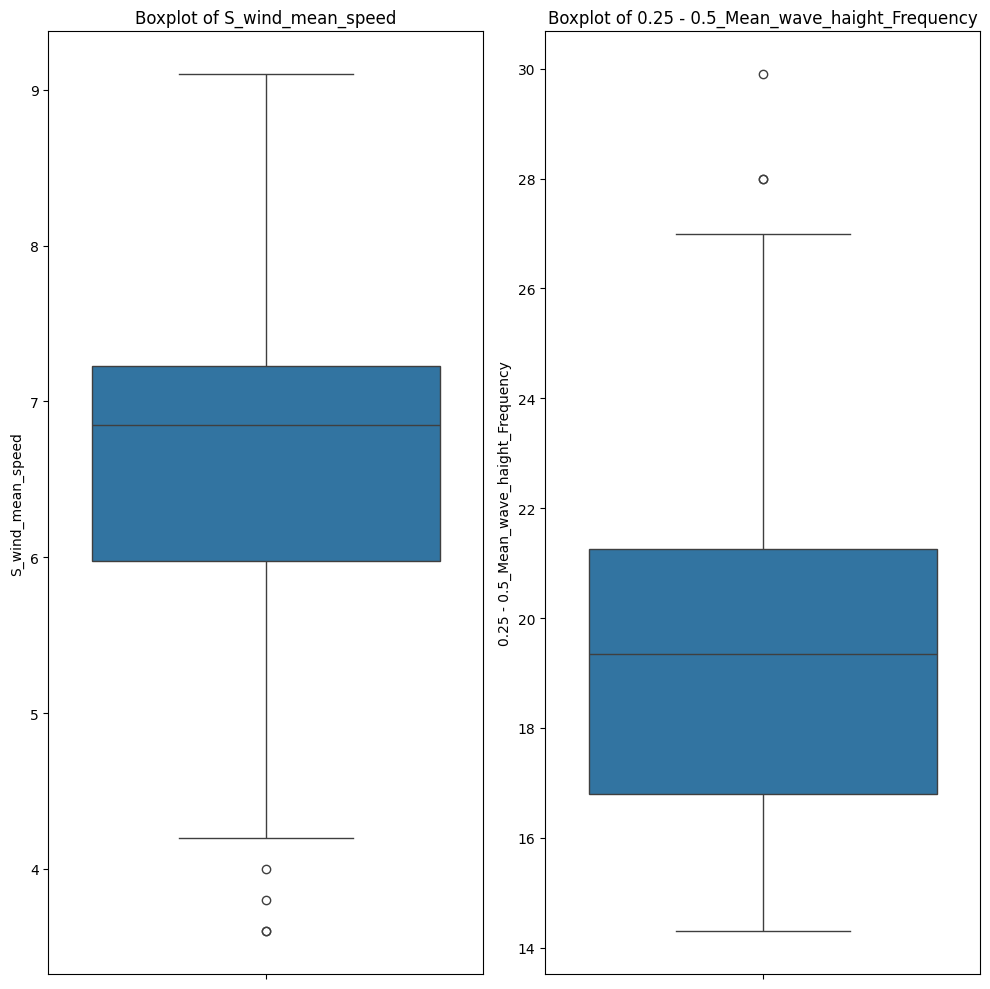

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Creating boxplots for important columns to identify outliers
important_columns = ['S_wind_mean_speed', '0.25 - 0.5_Mean_wave_haight_Frequency']
plt.figure(figsize=(10,10))
for i, col in enumerate(important_columns, 1):
    plt.subplot(1, len(important_columns), i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Here we notice that S_wind_mean_speed has certain outliers and some appear very far away, which might affect a lot our algorithm later. In order to deal with them we use IQR to filter them out.

In [ ]:
# Find the 75th and 25th percentiles
SWind_75 = data["S_wind_mean_speed"].quantile(0.75)
SWind_25 = data["S_wind_mean_speed"].quantile(0.25)
# Calculate iqr
SWind_iqr = SWind_75 - SWind_25
# Calculate the thresholds
upper = SWind_75 + (1.5 * SWind_iqr)
lower = SWind_25 - (1.5 * SWind_iqr)
# SUBSET the data
data = data[(data["S_wind_mean_speed"] > lower) & (data["S_wind_mean_speed"] < upper)]

print(data["S_wind_mean_speed"].describe())

count    54.000000
mean      6.701852
std       1.017672
min       4.200000
25%       6.025000
50%       6.900000
75%       7.200000
max       8.500000
Name: S_wind_mean_speed, dtype: float64


Let's have a look at our response variable distribution.

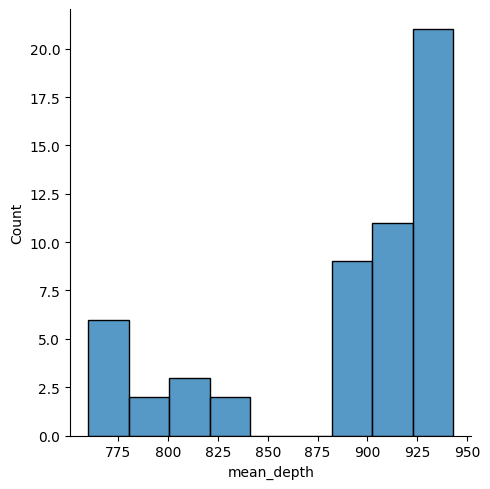

In [ ]:
sns.displot(data=data, x=data.mean_depth)

From this plot, we can understand that the range of mean_depth goes from 650m to 1050. Our goal is to see how can we achieve the minimum depth. We can also see that the depth from 800-930m is most common throughout the years.

Let's check how depth has changed with time.

<Axes: xlabel='time', ylabel='mean_depth'>

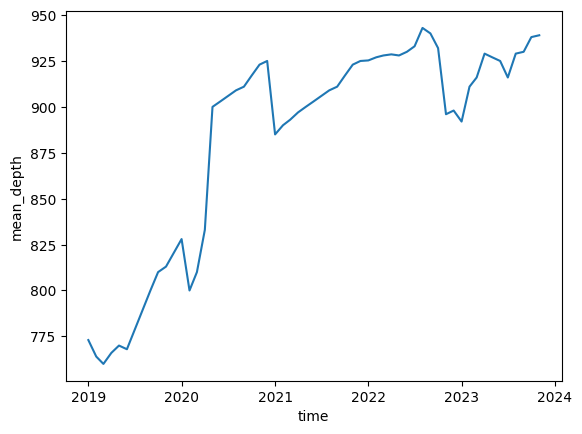

In [ ]:
sns.lineplot(data=data,x='time',y='mean_depth')

It looks like the depth has been having many fluctuations during the last 5 years. We can see that there is a pattern of it going too low and then immediately too high or vice versa.
That is because the mean depth of the port is based on the depths of 11 calats, which have different depths adapted for different types of vasels. During 2019-2020 there were dreddging operations in different parts of the port, that is why the graph shows extreme points. Also percepitations and high tide currents have had a great impact on these depths.

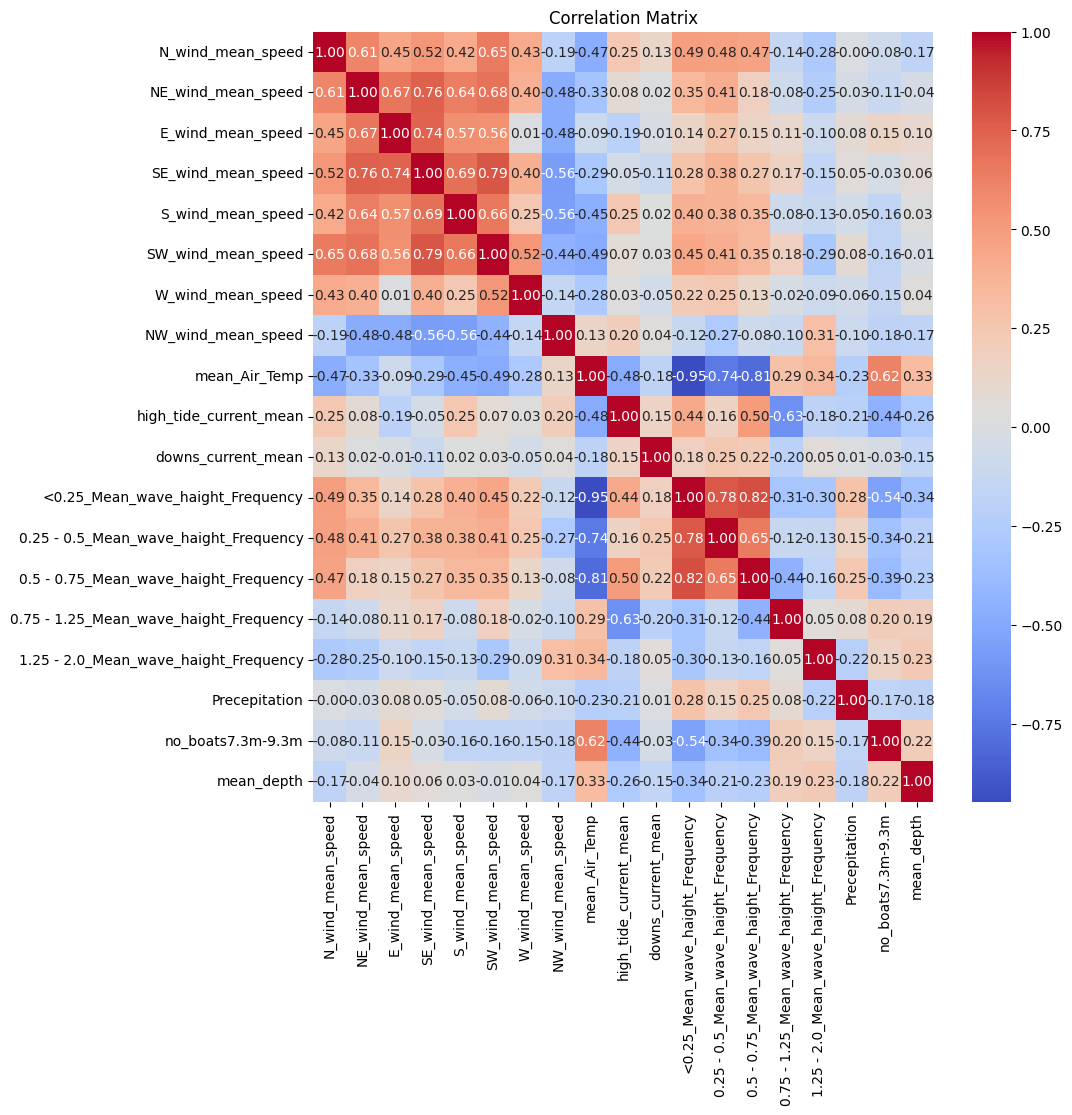

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculating correlations
correlation_matrix = data.corr(numeric_only=True)

# Visualizing correlations using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we can tell there is significant correlation between 'mean_depth' and other variable such as: E_wind_mean_speed, S_wind_mean_speed, mean_air_temp, '0.75 - 1.25_Mean_wave_haight_Frequency',
'1.25 - 2.0_Mean_wave_haight_Frequency', and a negative correlation between  'mean_depth' and 'NW_wind_mean_speed', 'high_tide_current_mean' 'downs_current_mean', '<0.25_Mean_wave_haight_Frequency', '0.25 - 0.5_Mean_wave_haight_Frequency'. To continue further with our model, we will choose those features that seem to have a correlation value >0.10 and <-0.10

///////////////////////////////////////////////////

* nga korelacioni verejme se:
sa me shume shpejtesia mesatare e ererave aq me te larta jan frekuencat e valeve ne port
GJITHASHTU
duke qene se valet e kategorise 1;2 dhe 3 jane me te shpeshta ato behen shkaltare te baticave ne port, ndaj mes tyre shohim nje korelacion relativishr te larte.

SHOHIM se
me rritjen e temperaturave kemi dhe rritje te anijeve, me tnelata te larta, qe hyne ne port (pra jane anije mallradh dhe pasagjeresh)
gjithashtu temperaturat kan korelacion negativ me frekuencen e valeve, kjo pasi sa me te ulta temperaturat (aq me shume kohe e keqe dhe me ere) aq me larta valet detare.
Rreshjet duke qene se jane ne 'mm' nuk kane ndikim ne mbushjen e bazenit por thjesht referojne kohe te keqe dhe me erera te shumta.



Pas ketyre analizave dhe duke u bazuar ne tabelen e korelacionit mund te themi se:
thellesia mesatare e detit ne port varet drejtpersedrejti nga ererat, temperaturat, batic/zbaticat, frekuencat e valeve dhe lehtesish nga anijet e tonazhit te larte.
Nga korelacioni mund te themi se:
Ererat nga perendimi, jugu dhe valet me frekuence te tipit 4 & 5 kan korelacion pozitiv me thellesine e portit (sa me e larte njera aq me shume rritet thellesia)

ndersa, ererat nga veriu dhe veri-perendimi sebashku me batic/zbaticat dhe valet e kategorise 1 & 2 kan korelacion negativ me thellesine ne port (sa me shume rriten keto faktor aq me shume ulet thellesia)

Ne baze te analizes se inxhinjerise detare baticat dhe zbaticat kompensojne njera tjetren duke ndodhur nga dy here brenda 24h secila. Por ne baze te korelacionit shikojme se ne Durres pergjate 5 viteve te fundit zbatica kryeson me shume. Nga ky fakt mund te themi se prurjet ranore... jane me te medha se prurjet ujore, gje qe ndikon drejt per se drejti ne mbushjen e bazenit dhe uljen e nivelit te thellesise.

/////////////////////////////////////////////////////////////////////

From the observed correlations, we notice that:

* The higher the average wind speed, the higher the frequencies of waves in the port. Additionally, since category 1, 2, and 3 waves are more frequent, they become indicators of disturbances in the port; thus, we observe a relatively high correlation among them.

* We observe that with increasing temperatures, there is also an increase in the number of vessels, with higher tonnages, entering the port (meaning cargo and passenger ships). Also, temperatures have a negative correlation with wave frequency, as lower temperatures (indicating worse weather conditions and more wind) correspond to higher sea waves. Rainfall, measured in millimeters, does not directly affect the port basin's filling but simply indicates bad weather and increased winds.

* After these analyses and based on the correlation table, we can conclude that the average depth of the port directly depends on the winds, temperatures, disturbances, wave frequencies, and to some extent, on high-tonnage vessels. From the correlation, we can say that:

* Winds from the west, south, and waves with frequency types 4 & 5 have a positive correlation with the port's depth (the higher one, the deeper it becomes).

* Conversely, winds from the north and northwest, together with disturbances and waves of category 1 & 2, have a negative correlation with the port's depth (the higher these factors, the shallower the depth).

* Based on marine engineering analysis, disturbances and counter-disturbances occur roughly twice within 24 hours. But based on the correlation, we see that in Durres over the past 5 years, disturbances have prevailed. From this fact, we can say that rainfall... is greater than water inflows, directly affecting the filling of the basin and the decrease in depth level.

<ipython-input-22-64a184898952>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, len(col)//2, i)


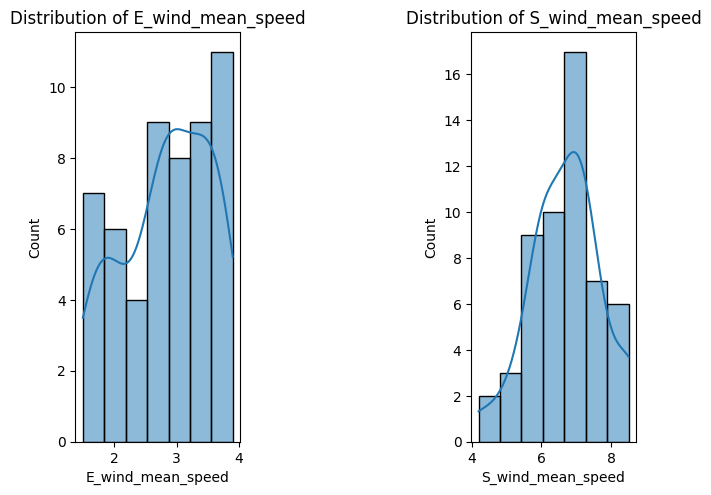

In [ ]:
# Checking feature distributions
col= ['E_wind_mean_speed','mean_Air_Temp','S_wind_mean_speed']
plt.figure(figsize=(20, 50))
for i, col in enumerate(col, 1):
    plt.subplot(8, len(col)//2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.show()


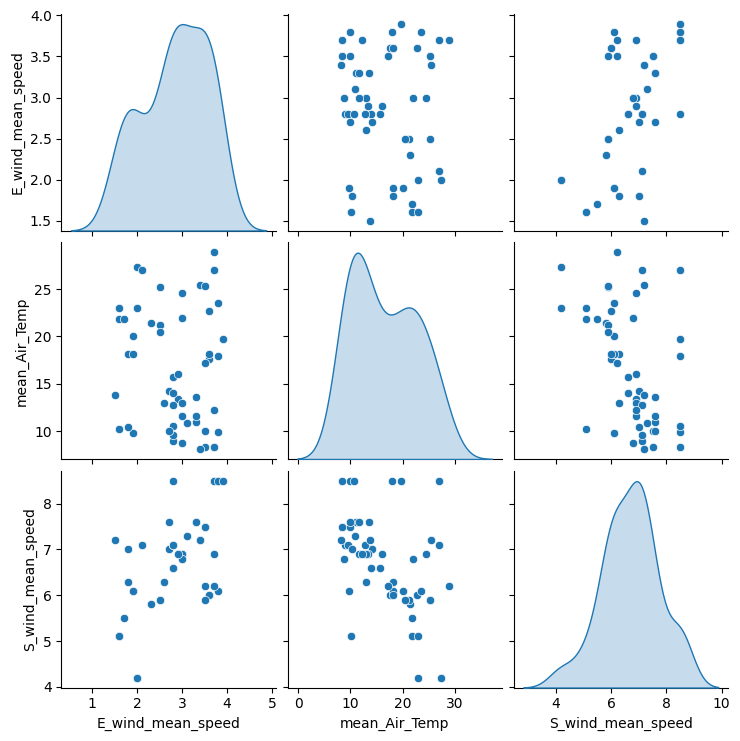

In [ ]:
# relationships between features - pairplot or so
selected_features=data[['E_wind_mean_speed','mean_Air_Temp','S_wind_mean_speed']]
sns.pairplot(data=selected_features, diag_kind='kde')

# Step 3: Model Training

Duke qene se na duhet te llogarisim how long the pool reaches the minimum depth limits, atehere ky problem is a regression problem, therefore we will have to figure out ways around it using some Regression Models. Specifically we have selected Linear Regression and ... (whichever you prefer).

Since we weren't sure which variables to use first, we are going to try out the Decision Tree Regressor, which might help us identify the most important features.

In [ ]:
data.head(2)

,time,N_wind_mean_speed,NE_wind_mean_speed,E_wind_mean_speed,SE_wind_mean_speed,S_wind_mean_speed,SW_wind_mean_speed,W_wind_mean_speed,NW_wind_mean_speed,mean_Air_Temp,high_tide_current_mean,downs_current_mean,<0.25_Mean_wave_haight_Frequency,0.25 - 0.5_Mean_wave_haight_Frequency,0.5 - 0.75_Mean_wave_haight_Frequency,0.75 - 1.25_Mean_wave_haight_Frequency,1.25 - 2.0_Mean_wave_haight_Frequency,Precepitation,no_boats7.3m-9.3m,mean_depth
0,2019-01-01,3.6,2.6,3.5,4.9,7.5,6.1,4.4,2.1,8.3,26.5,23.0,98.0,29.9,6.70,1.9,0.25,121.0,140.0,773.0
1,2019-02-01,4.5,2.6,2.8,4.3,7.1,7.2,5.5,3.6,9.0,25.0,22.0,96.0,27.0,6.18,2.5,0.10,120.0,132.0,764.0


Test set RMSE of dt: 44.72
Test set r-squared of rf: 0.12
Feature ranking:


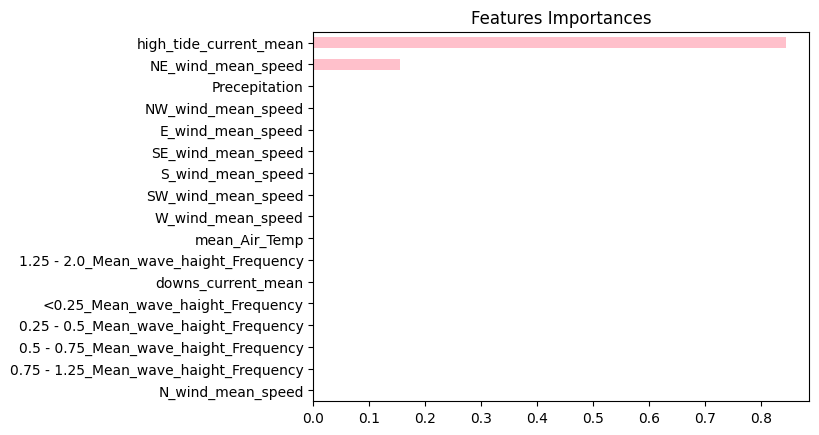

In [ ]:
# DECISION TREE REGRESSOR can help you understand which features are most influential in the model's decisions, can't get you the direct coefficients like in LR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import numpy as np
#splitting 80% train set and 20% test set
X=data.drop(['time','mean_depth','no_boats7.3m-9.3m'],axis=1)
y=data['mean_depth']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3)

regressor = DecisionTreeRegressor(max_depth=5,min_samples_leaf=0.23,random_state=3)
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
r2_test = r2_score(y_test,y_pred)
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print('Test set r-squared of rf: {:.2f}'.format(r2_test))
importances = regressor.feature_importances_
# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Create a pd.Series of features importances
importances = pd.Series(data=regressor.feature_importances_,index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh",color='pink')
plt.title('Features Importances')
plt.show()

[Text(0.6, 0.8333333333333334, 'x[9] <= 24.5\nsquared_error = 3404.72\nsamples = 43\nvalue = 884.991'),
 Text(0.4, 0.5, 'x[1] <= 2.25\nsquared_error = 1760.327\nsamples = 26\nvalue = 906.1'),
 Text(0.2, 0.16666666666666666, 'squared_error = 2682.026\nsamples = 14\nvalue = 892.786'),
 Text(0.6, 0.16666666666666666, 'squared_error = 236.912\nsamples = 12\nvalue = 921.633'),
 Text(0.8, 0.5, 'squared_error = 4195.855\nsamples = 17\nvalue = 852.706')]

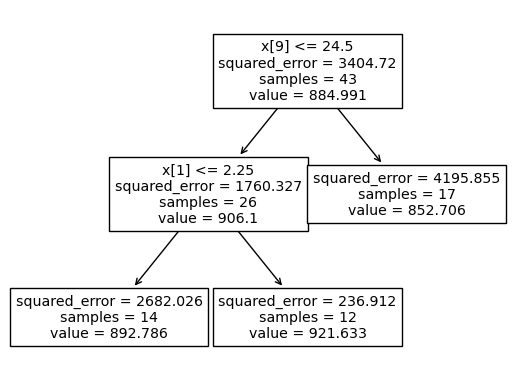

In [ ]:
from sklearn import tree
tree.plot_tree(regressor)

Test set RMSE of rf: 71.18
Test set r-squared of rf: -0.82


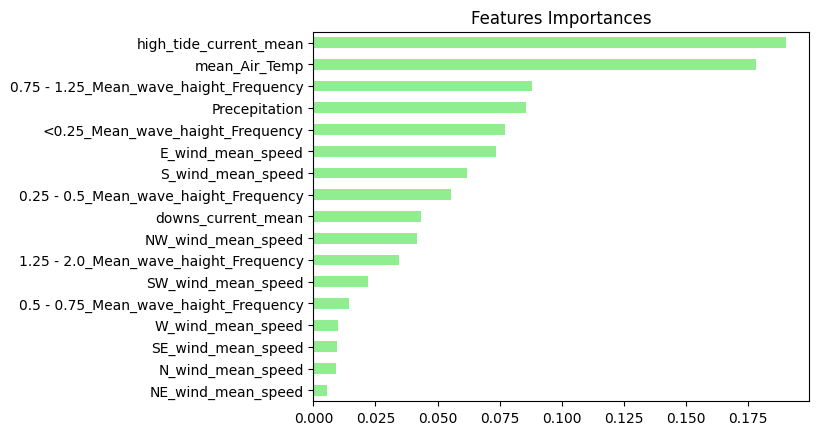

In [ ]:
# Random Forest for feature importances
# Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set.
# Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features.
# The ensemble is trained on a different bootstrap sample from the training set and when a tree is trained, at each node, only d features are sampled from all features without replacement. The node is then split using the sampled feature that maximizes information gain.
# In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.
# For classification, the final prediction is made by majority voting.For regression, the final prediction is the average of all the labels predicted by the base estimators.
# Random Forests achieves a lower variance than individual trees.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

X=data.drop(['time','mean_depth','no_boats7.3m-9.3m'],axis=1)
y=data['mean_depth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

n_features=X_train.columns.size
rf = RandomForestRegressor(n_estimators=25, max_depth=5, random_state=21)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test,y_pred)**(1/2)
r2_test = r2_score(y_test,y_pred)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Test set r-squared of rf: {:.2f}'.format(r2_test))
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind="barh",color='lightgreen') # Draw a horizontal barplot of importances_sorted
plt.title('Features Importances')
plt.show()

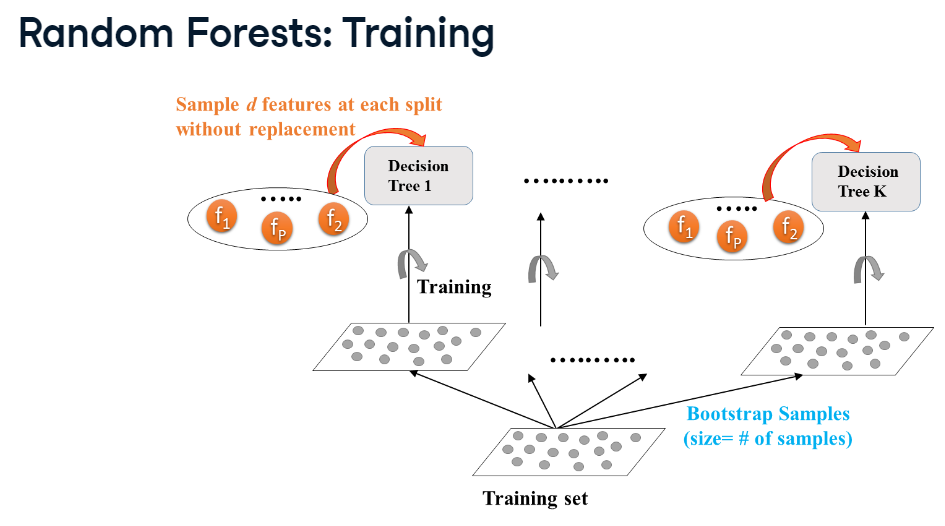

In [ ]:
#print(X.head())

   N_wind_mean_speed  NE_wind_mean_speed  E_wind_mean_speed  \
0                3.6                 2.6                3.5   
1                4.5                 2.6                2.8   
2                3.4                 2.5                3.3   
3                2.8                 2.5                2.7   
4                2.5                 1.9                1.8   

   SE_wind_mean_speed  S_wind_mean_speed  SW_wind_mean_speed  \
0                 4.9                7.5                 6.1   
1                 4.3                7.1                 7.2   
2                 4.4                7.6                 6.7   
3                 3.9                7.0                 6.1   
4                 3.1                6.3                 4.6   

   W_wind_mean_speed  NW_wind_mean_speed  mean_Air_Temp  \
0                4.4                 2.1            8.3   
1                5.5                 3.6            9.0   
2                4.2                 3.6           11.0   


NE_wind_mean_speed, high_tide_current_mean and downs_current_mean seem important features to consider for our model.

In [ ]:
# MODELI 1 -SHEMBULL
#LINEAR Regression
# from sklearn.linear_model import LinearRegression
# X=data[['mean_Air_Temp','downs_current_mean', '0.25 - 0.5_Mean_wave_haight_Frequency','NW_wind_mean_speed', 'Precepitation', 'SW_wind_mean_speed']]
# y=data['mean_depth']
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)

# reg = LinearRegression()
# reg.fit(X_train, y_train)
# y_pred = reg.predict(X_test)
# print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))
# *Result:
# Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ] #The first two predictions appear to be within around 5% of the actual values from the test set!

In [ ]:
# MODEL EVALUATION
# from sklearn.metrics import mean_squared_error
# r_squared = reg.score(X_test, y_test)   #Compute R-squared
# rmse = mean_squared_error(y_test, y_pred, squared=False)    # Compute RMSE
# print("R^2: {}".format(r_squared))
# print("RMSE: {}".format(rmse))
# # *Result:
# #   R^2: 0.9990165886162027
# #   RMSE: 2942.372219812037
# #The features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!
# # measuring mean and std
# print(np.mean(y_pred))
# print(np.std(y_pred))
# print(np.quantile(y_pred, [0.025, 0.975]))
# *Result:
#     0.7536937416666666
#     0.012305386274436092
#     [0.74141863 0.77191915]
# An average score of 0.75 with a low standard deviation is pretty good for a model out of the box!
# Printojme koeficientet e ekuacionit
#print('Coefficients:')
#for feature, coef in zip(['X1','X2'], model.coef_):
#  print(f'{feature}: {coef:.2f}')
#  print(f'Intercept: {model.intercept_:.2f}')

In [ ]:
# import matplotlib.pyplot as plt

# # Plot outputs
# plt.scatter(y_test,y_pred, color="black")
# plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color="blue", linewidth=3)

# plt.xlabel('Actual values')
# plt.ylabel('Predicted values')
# plt.xticks(())
# plt.yticks(())

# plt.show()

In [ ]:
#to check all the results from the model, we get a summary from statsmodels
import statsmodels.api as sm
X=data[['high_tide_current_mean', 'mean_Air_Temp', '0.75 - 1.25_Mean_wave_haight_Frequency','Precepitation','NE_wind_mean_speed', '<0.25_Mean_wave_haight_Frequency', 'E_wind_mean_speed', 'S_wind_mean_speed']]
y=data['mean_depth']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.333
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.252
Time:                        23:23:15   Log-Likelihood:                -288.72
No. Observations:                  54   AIC:                             595.4
Df Residuals:                      45   BIC:                             613.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

We filter out all the variables which seem to have no significance in the prediction of our model (P value closer to 1) and fit the model again. When P value is < 0.05 then it would mean that the model would be working.

In [ ]:
import numpy as np
X=data[['high_tide_current_mean', 'mean_Air_Temp', '0.75 - 1.25_Mean_wave_haight_Frequency','Precepitation','NE_wind_mean_speed', '<0.25_Mean_wave_haight_Frequency', 'E_wind_mean_speed', 'S_wind_mean_speed']]
y=data['mean_depth']

degree=2
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1.525
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.143
Time:                        23:23:15   Log-Likelihood:                -280.79
No. Observations:                  54   AIC:                             595.6
Df Residuals:                      37   BIC:                             629.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        216.1249    221.431      0.976      0.3

In [ ]:
# KY MODEL NA JEP 53% SAKTESI
# import numpy as np
# X=data[['high_tide_current_mean','NE_wind_mean_speed', '<0.25_Mean_wave_haight_Frequency', 'E_wind_mean_speed', '1.25 - 2.0_Mean_wave_haight_Frequency', 'Precepitation']]
# y=data['mean_depth']

# degree=3
# X = sm.add_constant(X)
# poly_features = np.column_stack([X**i for i in range(1,degree+1)])
# model = sm.OLS(y, poly_features).fit()
# predictions = model.predict(poly_features)

# print_model = model.summary()
# print(print_model)

In [ ]:
import numpy as np
X=data[['high_tide_current_mean', 'mean_Air_Temp', '0.75 - 1.25_Mean_wave_haight_Frequency','Precepitation','NE_wind_mean_speed', '<0.25_Mean_wave_haight_Frequency', 'E_wind_mean_speed', 'S_wind_mean_speed']]
y=data['mean_depth']

degree=3
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1.341
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.224
Time:                        23:23:15   Log-Likelihood:                -274.30
No. Observations:                  54   AIC:                             598.6
Df Residuals:                      29   BIC:                             648.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1085.0348    881.642     -1.231      0.2

In [ ]:
# HEQIM mean_air_temp duke qene se eshte e korreluar me shume variable te tjere si psh 0.75... dhe shohim qe nuk ben diference tek r squared
import numpy as np
X=data[['high_tide_current_mean', '0.75 - 1.25_Mean_wave_haight_Frequency','Precepitation','NE_wind_mean_speed', '<0.25_Mean_wave_haight_Frequency', 'E_wind_mean_speed', 'S_wind_mean_speed']]
y=data['mean_depth']

degree=3
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1.687
Date:                Wed, 05 Jun 2024   Prob (F-statistic):             0.0887
Time:                        23:23:15   Log-Likelihood:                -274.34
No. Observations:                  54   AIC:                             592.7
Df Residuals:                      32   BIC:                             636.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1159.9665    719.325     -1.613      0.1

In [ ]:
# HEQIM S_WIND dhe marrim rezultatin me me te kenaqshem 50% me 6 variabla
X=data[['high_tide_current_mean', '0.75 - 1.25_Mean_wave_haight_Frequency','Precepitation','NE_wind_mean_speed', '<0.25_Mean_wave_haight_Frequency', 'E_wind_mean_speed']]
y=data['mean_depth']

degree=3
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1.953
Date:                Wed, 05 Jun 2024   Prob (F-statistic):             0.0441
Time:                        23:23:15   Log-Likelihood:                -275.69
No. Observations:                  54   AIC:                             589.4
Df Residuals:                      35   BIC:                             627.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -745.6070    616.647     -1.209      0.2

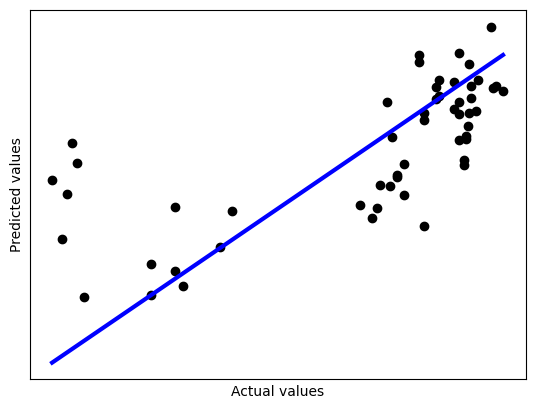

In [ ]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(y,predictions, color="black")
plt.plot([min(y),max(y)], [min(y),max(y)], color="blue", linewidth=3)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Rezultati me i kenaqshem me 5 variabla
import numpy as np
X=data[['high_tide_current_mean','Precepitation', '<0.25_Mean_wave_haight_Frequency', 'NE_wind_mean_speed', 'E_wind_mean_speed']]
y=data['mean_depth']

degree=3
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2.362
Date:                Wed, 05 Jun 2024   Prob (F-statistic):             0.0164
Time:                        23:23:15   Log-Likelihood:                -276.68
No. Observations:                  54   AIC:                             585.4
Df Residuals:                      38   BIC:                             617.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -640.4503    592.521     -1.081      0.2

In [ ]:
# Rezultati me i kenaqshem me 4 variabla
import numpy as np
X=data[['high_tide_current_mean','Precepitation', '<0.25_Mean_wave_haight_Frequency', 'NE_wind_mean_speed']]
y=data['mean_depth']

degree=3
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2.944
Date:                Wed, 05 Jun 2024   Prob (F-statistic):            0.00492
Time:                        23:23:15   Log-Likelihood:                -277.68
No. Observations:                  54   AIC:                             581.4
Df Residuals:                      41   BIC:                             607.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -658.4190    546.665     -1.204      0.2

In [ ]:
# ME E LARTA QE MARRIM ME 3 VARIABLA - GJE QE DMTH QE MAX_DEPTH NUK SHPJEGOHET MIRE ME PAK VARIABLA
import numpy as np
X=data[['high_tide_current_mean', '<0.25_Mean_wave_haight_Frequency', 'Precepitation']]
y=data['mean_depth']

degree=3
X = sm.add_constant(X)
poly_features = np.column_stack([X**i for i in range(1,degree+1)])
model = sm.OLS(y, poly_features).fit()
predictions = model.predict(poly_features)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             mean_depth   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     3.472
Date:                Wed, 05 Jun 2024   Prob (F-statistic):            0.00259
Time:                        23:23:44   Log-Likelihood:                -279.97
No. Observations:                  54   AIC:                             579.9
Df Residuals:                      44   BIC:                             599.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -817.9776    495.838     -1.650      0.1

Regarding Generalization Error, we need to find a balance between the bias and the variance, while keeping in mind the model complexity. In our above cases, we notice that the polynomial model of degree 3 with 8 chosen most important features gives us the highest R-Squared (0.526). But this model is much too complex because of its degree and number of features. The moment we try to reduce the degree or number of features, we notice the bias redues too. Therefore we will have to pick the one model which is not too complex, but meanwhile doesn't reduce the bias too much. In this case we pick the one that explains at least 50% of the data and includes only 6 of the features. We also have the plot to see the regression line, where we can notice how the model touches at least 4 of the data points and has approached as much as possible the other ones.